In [176]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [177]:
def show_image(a, reverse=False):
    a = a.reshape((3,3))
    if reverse:
        plt.imshow(-1 * (a - 255),cmap='gray')
    else:
        plt.imshow(a, cmap='gray')

def generate(count):
    labels = np.zeros((count,)).astype(int)
    images = np.zeros((count, 3, 3)).astype(int)
    k = 0
    # primary images
    for i in range(3):
        for j in range(3):
            if np.absolute(i - j) < 2:
                images[k, i, :] = [0, 255, 255]
                images[k, j, 0] = 255
                labels[k] = 0
                k += 1
                images[k,:,:] = images[k-1,:,:].T
                labels[k] = 1
                k += 1
                if i != j:
                    images[k,:,:] = np.fliplr(images[k-2,:,:])
                    labels[k] = 0
                    k += 1
                    images[k,:,:] = images[k-1,:,:].T
                    labels[k] = 1
                    k += 1
    # random noising of pixels
    for i in range(count - 22):
        j = i % 22
        images[i+22, :, :] = images[j,:,:]
        for x in range(3):
            labels[i+22] = i % 2
            for y in range(3):
                images[i+22,x,y] = np.floor(images[i+22,x,y] * np.random.uniform(.5, 1))     
    return images, labels

def flatten_save(images, labels, filename):
    data = np.zeros((labels.shape[0], 10)).astype(int)
    for i in range(labels.shape[0]):
        data[i, 0] = labels[i]
        data[i, 1:] = images[i,:,:].ravel()
    np.savetxt(filename, data, delimiter=",", fmt='%5d')

In [178]:
images, labels = generate(1000)
flatten_save(images, labels, 'data.csv')

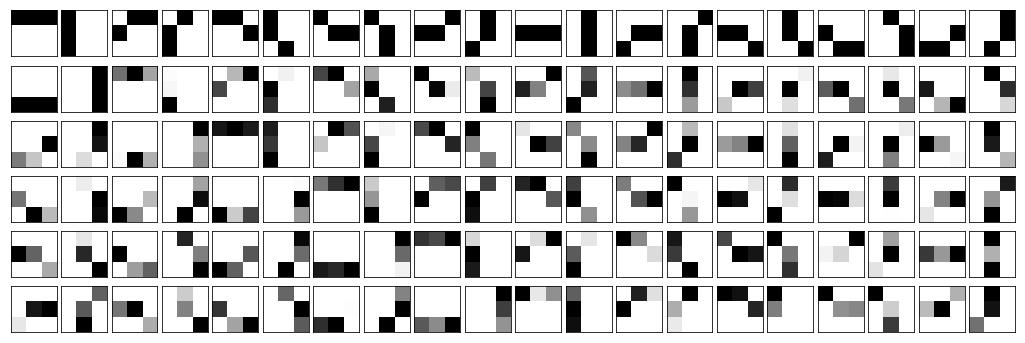

In [179]:
fig, axes = plt.subplots(6, 20, figsize=(18, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
   ax.imshow(-1 * (examples[i] - 255), cmap='gray') 